# **Importing all required libraries**

In [ ]:
!pip install nltk

In [ ]:
import nltk

nltk.data.path.clear()  # Clear cached paths
nltk.download('punkt', force=True)  # Force re
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
# nltk.download('corpus')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
text = "God is Great! I won a lottery."
tokens = word_tokenize(text,language='english', preserve_line=True)

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# import shutil
# import os

# # This clears out the broken resource
# shutil.rmtree('/root/nltk_data', ignore_errors=True)

In [ ]:
# import nltk

# # Force new download into the default path
# nltk.download('punkt', force=True)

In [ ]:
# import re

# def simple_sent_tokenize(text):
#     return re.split(r'(?<=[.!?])\s+', text.strip())

# text = "God is Great! I won a lottery."
# print(simple_sent_tokenize(text))


In [ ]:
# from nltk.tokenize import sent_tokenize
# text = "God is Great! I won a lottery."
# print(sent_tokenize(text))

In [ ]:
import pandas as pd
import re
# import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from collections import defaultdict
import numpy as np
from tqdm import tqdm

# **Importing the data**

In [ ]:
df = pd.read_csv('train.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
print(df['medical_abstract'].iloc[0])

Tissue changes around loose prostheses. A canine model to investigate the effects of an antiinflammatory agent. The aseptically loosened prosthesis provided a means for investigating the in vivo and in vitro activity of the cells associated with the loosening process in seven dogs. The cells were isolated and maintained in culture for sufficient periods of time so that their biologic activity could be studied as well as the effect of different agents added to the cells in vivo or in vitro. The biologic response as determined by interleukin-1 and prostaglandin E2 activity paralleled the roentgenographic appearance of loosening and the technetium images and observations made at the time of revision surgery. The correlation between clinical, roentgenographic, histologic, and biochemical loosening indicates that the canine model is suitable for investigating the mechanisms of prosthetic failure. A canine model permits the study of possible nonsurgical therapeutic interventions with the ult

In [ ]:
# Initial data information
df.info()

NameError: name 'df' is not defined

In [ ]:
# Initial Data Summary
df.describe()

NameError: name 'df' is not defined

In [ ]:
df.shape

NameError: name 'df' is not defined

# **Data Cleaning**

In [ ]:
df.isnull().sum()

,0
condition_label,0
medical_abstract,0


# **Lowercasing**

In [ ]:
print(f"before lowercasing: \n{df['medical_abstract'].head()}")

NameError: name 'df' is not defined

In [ ]:
df['medical_abstract'] = df['medical_abstract'].str.lower()


print(f"After: \n{df['medical_abstract'].head()}")

After: 
0    tissue changes around loose prostheses. a cani...
1    neuropeptide y and neuron-specific enolase lev...
2    sexually transmitted diseases of the colon, re...
3    lipolytic factors associated with murine and h...
4    does carotid restenosis predict an increased r...
Name: medical_abstract, dtype: object


# **Confusion about removing numbers, need to check**

In [ ]:
# def remove_punct_num(text):
#     return re.sub(r'[^a-z\s]', '', text)

# df['no_punct_num'] = df['medical_abstract'].apply(remove_punct_num)
# print(df['no_punct_num'].head())

# **Tokenization**

In [ ]:
print(df['medical_abstract'][0])

tissue changes around loose prostheses. a canine model to investigate the effects of an antiinflammatory agent. the aseptically loosened prosthesis provided a means for investigating the in vivo and in vitro activity of the cells associated with the loosening process in seven dogs. the cells were isolated and maintained in culture for sufficient periods of time so that their biologic activity could be studied as well as the effect of different agents added to the cells in vivo or in vitro. the biologic response as determined by interleukin-1 and prostaglandin e2 activity paralleled the roentgenographic appearance of loosening and the technetium images and observations made at the time of revision surgery. the correlation between clinical, roentgenographic, histologic, and biochemical loosening indicates that the canine model is suitable for investigating the mechanisms of prosthetic failure. a canine model permits the study of possible nonsurgical therapeutic interventions with the ult

In [ ]:
# from nltk.tokenize import word_tokenize
# from nltk.tokenize import sent_tokenize

# tokens_list = []

# for text in df['medical_abstract']:
#   # print(f"text: {text}")
#   # tokens = word_tokenize(text,language='english', preserve_line=True)
#   sentences = simple_sent_tokenize(text)
#   # tokens = sent_tokenize(text)
#   tokens_list.append(sentences)

# df['tokens'] = tokens_list
# print(df['tokens'][0])

# # df['tokens'] = df['medical_abstract'].apply(word_tokenize)
# # print(df['tokens'].head())

# # from nltk.tokenize import TreebankWordTokenizer

# # tokenizer = TreebankWordTokenizer()
# # df['tokens'] = df['no_punct_num'].apply(tokenizer.tokenize)
# # print(df['tokens'].head())


In [ ]:
# ps = PorterStemmer()

# # Custom sentence tokenizer (no dependency on NLTK's punkt)
# def simple_sent_tokenize(text):
#     return re.split(r'(?<=[.!?])\s+', text.strip())

# # Final preprocessing function using custom sentence splitter
# def pre_processing_by_nltk(doc, stemming=True, need_sent=False):
#     sentences = simple_sent_tokenize(doc)
#     tokens = []

#     for sent in sentences:
#         words = word_tokenize(sent)

#         if stemming:
#             words = [ps.stem(word) for word in words]

#         if need_sent:
#             tokens.append(words)     # keep sentences separate
#         else:
#             tokens += words          # flatten all tokens

#     return tokens

In [ ]:
# tokens_list = []

# for idx, row in df.iterrows():
#     abstract = row['medical_abstract']
#     tokens = pre_processing_by_nltk(abstract, need_sent=True)  # works now
#     tokens_list.append(tokens)

# df['tokens'] = tokens_list


In [ ]:
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# stop_words = set(stopwords.words('english'))

# print(f"stop_words: {stop_words}")

# df['no_stopwords'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
# print(df['no_stopwords'].head())

In [ ]:
 !pip install spacy
 !python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 85.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp_processor = spacy.load("en_core_web_sm")

AttributeError: module 'torch' has no attribute 'version'

In [ ]:
text = "God is Great! I won a lottery."
doc = nlp_processor(text)
print(type(doc))

<class 'spacy.tokens.doc.Doc'>


In [ ]:
for sent in doc.sents:
  print(sent)

God is Great!
I won a lottery.


In [ ]:
for word in doc:
  print(type(word))
  print(word.text)

<class 'spacy.tokens.token.Token'>
God
<class 'spacy.tokens.token.Token'>
is
<class 'spacy.tokens.token.Token'>
Great
<class 'spacy.tokens.token.Token'>
!
<class 'spacy.tokens.token.Token'>
I
<class 'spacy.tokens.token.Token'>
won
<class 'spacy.tokens.token.Token'>
a
<class 'spacy.tokens.token.Token'>
lottery
<class 'spacy.tokens.token.Token'>
.


In [ ]:
for word in doc:
  print(word.text, word.lemma_)

God God
is be
Great great
! !
I I
won win
a a
lottery lottery
. .


In [ ]:
test_case1 = "The nuggests are priced at $4.99. Business Are you fuzzy dity, dizzy crazy??! I'm not sure what's the effect the dots....."

In [ ]:
import en_core_web_sm
nlp_processor = en_core_web_sm.load()
# return a list of tokens
def pre_processing_by_spacy(doc, lemma = True, need_sent = False):
  doc_class = nlp_processor(doc)
  tokens = []
  # step 1: get sentences
  for sent in doc_class.sents:
    # step 2: get tokens
    # step 3 (optional): lemma
    if lemma:
      words = [token.lemma_ for token in sent]
    else:
      words = [token.text for token in sent]
    if need_sent:
      tokens.append(words)
    else:
      tokens += words
  return tokens

pre_processing_by_spacy(test_case1, need_sent = True)

[['the', 'nuggest', 'be', 'price', 'at', '$', '4.99', '.'],
 ['business',
  'be',
  'you',
  'fuzzy',
  'dity',
  ',',
  'dizzy',
  'crazy',
  '?',
  '?',
  '!'],
 ['I',
  'be',
  'not',
  'sure',
  'what',
  'be',
  'the',
  'effect',
  'the',
  'dot',
  '.....']]

In [ ]:
pre_processing_by_spacy("good better best")

['good', 'well', 'well']

In [ ]:
tokens_list = []

for idx, row in df.iterrows():
    abstract = row['medical_abstract']
    tokens = pre_processing_by_spacy(abstract, need_sent=True)  # or False
    tokens_list.append(tokens)

df['tokens'] = tokens_list

In [ ]:
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()

# df['lemmatized'] = df['no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
# print(df['lemmatized'].head())


In [ ]:
def remove_stopwords_nested(nested_tokens):
    return [
        [token for token in sentence if not nlp_processor.vocab[token].is_stop]
        for sentence in nested_tokens
    ]

In [ ]:
df['tokens_no_stopwords'] = df['tokens'].apply(remove_stopwords_nested)

NameError: name 'df' is not defined

In [ ]:
print(df[['medical_abstract', 'tokens_no_stopwords']].head())


                                    medical_abstract  \
0  tissue changes around loose prostheses. a cani...   
1  neuropeptide y and neuron-specific enolase lev...   
2  sexually transmitted diseases of the colon, re...   
3  lipolytic factors associated with murine and h...   
4  does carotid restenosis predict an increased r...   

                                 tokens_no_stopwords  
0  [[tissue, change, loose, prosthesis, .], [cani...  
1  [[neuropeptide, y, neuron, -, specific, enolas...  
2  [[sexually, transmit, disease, colon, ,, rectu...  
3  [[lipolytic, factor, associate, murine, human,...  
4  [[carotid, restenosis, predict, increase, risk...  


In [ ]:
df.to_csv('preprocessed_medical_abstracts.csv', index=False)

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Flatten all tokens into one big list
all_tokens = [token for row in df['tokens_no_stopwords'] for sent in row for token in sent]

# Step 2: Count frequencies
freq = defaultdict(int)
for token in all_tokens:
    freq[token] += 1

# Step 3: Sort by frequency
sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
ranks = list(range(1, len(sorted_freq) + 1))
frequencies = [item[1] for item in sorted_freq]

# # Step 4: Plot Zipf's Law (log-log plot)
# plt.figure(figsize=(10, 6))
# plt.loglog(ranks, frequencies, marker=".")
# plt.title("Zipf's Law - Word Frequencies in Medical Abstracts")
# plt.xlabel("Rank of word (log)")
# plt.ylabel("Frequency of word (log)")
# plt.grid(True)
# plt.show()

NameError: name 'df' is not defined

In [ ]:
print(len(freq))

NameError: name 'freq' is not defined

In [ ]:
order_tokens = sorted(list(freq.items()), key = lambda x : -x[1])
print(order_tokens[:100])

[('.', 98897), (',', 83361), ('-', 38704), (')', 36167), ('(', 35434), ('patient', 31314), ('%', 17312), ('study', 7821), ('group', 7061), ('cell', 6886), ('disease', 6352), ('+', 6206), ('p', 5816), ('year', 5713), ('/-', 5665), (';', 5552), ('use', 5522), ('case', 5501), ('/', 5125), (':', 5092), ('treatment', 5064), ('result', 4837), ('increase', 4766), ('tumor', 4606), ('=', 4286), ('control', 3941), ('high', 3932), ('1', 3764), ('blood', 3706), ('2', 3703), ('rate', 3695), ('follow', 3615), ('effect', 3510), ('clinical', 3438), ('mean', 3171), ('therapy', 3124), ('level', 3120), ('artery', 3071), ('month', 3059), ('cancer', 3058), ('pressure', 3058), ('report', 3057), ('associate', 3055), ('age', 3011), ('risk', 2960), ('3', 2947), ('normal', 2934), ('low', 2870), ('compare', 2810), ('coronary', 2792), ('significantly', 2775), ('significant', 2761), ('acute', 2727), ('factor', 2704), ('present', 2665), ('treat', 2613), ('5', 2564), ('time', 2557), ('carcinoma', 2503), ('occur', 24

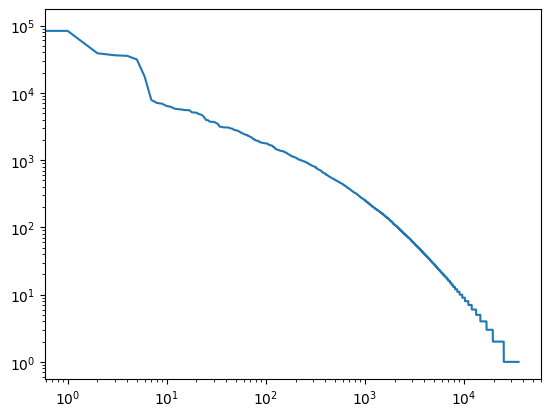

In [ ]:
y = [freq for token, freq in order_tokens]
plt.loglog(y)

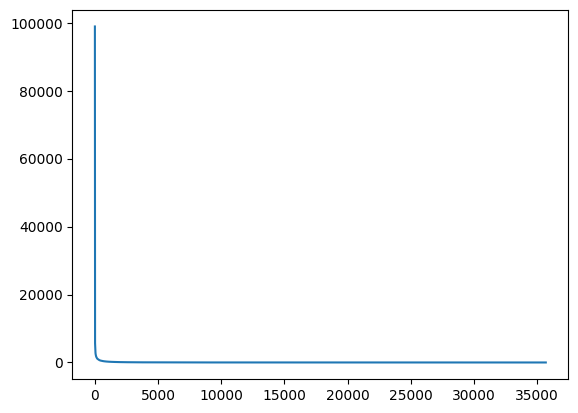

In [ ]:
plt.plot([i for i in range(len(y))], y)

In [ ]:
df['token_string'] = df['tokens_no_stopwords'].apply(lambda sents: ' '.join([word for sent in sents for word in sent]))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(
    lowercase=False,       # Already lowercased
    tokenizer=str.split,   # Use simple whitespace split
    preprocessor=None,
    use_idf=True,
    smooth_idf=True,
    norm='l2'
)

X = vectorizer.fit_transform(df['token_string'])  # TF-IDF matrix
# X = vectorizer.fit_transform(df['token_string'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
print(X.shape)  # (num_docs, num_features)
print(type(X))  # <class 'scipy.sparse.csr.csr_matrix'>

(11550, 35686)
<class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
vectorizer.get_feature_names_out()[:10]

array(['!', '"', '#', '$', '%', '&', "'", '(', '(=', ')'], dtype=object)

In [ ]:
# # Step 1: Flatten each doc to 1D list of tokens (no stopwords, lemmatized)
# df['flat_tokens'] = df['tokens_no_stopwords'].apply(lambda sents: [word for sent in sents for word in sent])

# # Step 2: Document Frequency (DF)
# DF = defaultdict(float)

# for doc in tqdm(df['flat_tokens']):
#     unique_tokens = set(doc)
#     for token in unique_tokens:
#         DF[token] += 1

# # Step 3: Compute TF-IDF for each doc
# N = len(df)  # total number of documents
# tfidf_vectors = []

# for doc in df['flat_tokens']:
#     tfidf = {}
#     total_terms = len(doc)

#     # Term Frequency (TF)
#     TF = defaultdict(float)
#     for token in doc:
#         TF[token] += 1
#     for token in TF:
#         TF[token] /= total_terms

#     # TF-IDF
#     for token in TF:
#         idf = np.log(N / (DF[token] + 1))
#         tfidf[token] = TF[token] * idf

#     tfidf_vectors.append(tfidf)

# # Store TF-IDF vectors back in DataFrame
# df['tfidf'] = tfidf_vectors

In [ ]:
# from pprint import pprint
# pprint(df['tfidf'].iloc[0])